In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

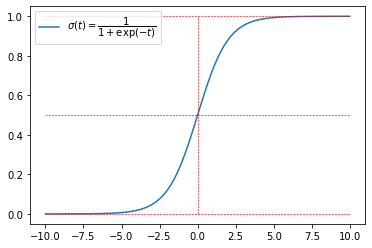

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

xlist = np.linspace(-10,10,1000)
ylist = sigmoid(xlist)

plt.plot(xlist,ylist, label=r"$\sigma (t)=\dfrac{1}{1+\exp(-t)}$")

plt.plot([-10,10],[0.5,0.5], 'r--', linewidth=0.6)
plt.plot([-10,10],[1,1], 'r--', linewidth=0.6)
plt.plot([-10,10],[0,0], 'r--', linewidth=0.6)
plt.plot([0,0],[0,1],'r--', linewidth=0.6)

plt.legend(loc="upper left", fontsize=10)

In [5]:
# 데이터셋 로드
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

In [7]:
# 로드된 데이터셋은 일종의 dictionary 형태
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris["data"][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [18]:
# 0: setosa 1 : versicolor 2 : virginica
iris["target"][:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# 꽃잎의 너비(petal)을 이용하여 virginica이면 label 1, 아니면 label 0이 되도록 학습

X = iris["data"][:,3:] # 뒤에 :를 붙이는 이유는 차원을 그대로 가져오기 위해 !! (2차원)
y = (iris["target"]==2).astype(np.int)

C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression(penalty="none")
log_reg.fit(X,y)

LogisticRegression(penalty='none')

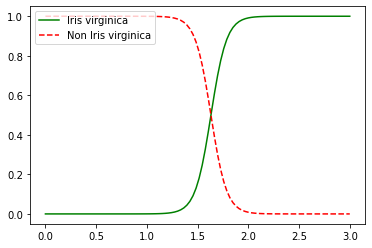

In [30]:
X_new = np.linspace(0,3,100).reshape(-1,1) # reshape을 하는 이유 : 2차원 차원을 만들기 위해서
y_new_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_new_proba[:,1], "g-", label = "Iris virginica")
plt.plot(X_new, y_new_proba[:,0], "r--", label = "Non Iris virginica")
plt.legend(loc = "upper left",fontsize = 10)

In [39]:
positive_idx = y_new_proba >= 0.5
print(np.min(y_new_proba[positive_idx]))
decision_id = np.argmin(y_new_proba[positive_idx])
print(np.argmin(y_new_proba[positive_idx]))
print(f"Virginica로 판별하는 너비의 길이 : 대략 {X_new[decision_id,0]:.2f}cm 이상일 때")

0.51529313483943
54
Virginica로 판별하는 너비의 길이 : 대략 1.64cm 이상일 때


C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


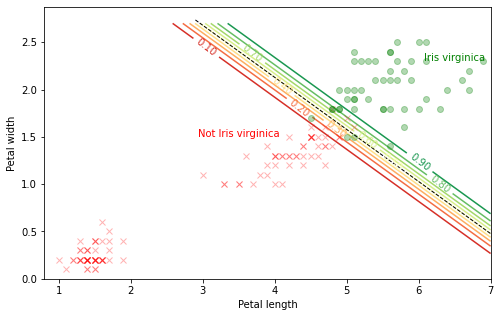

In [46]:
X2 = iris["data"][:,2:] # 꽃잎의 길이, 너비
y2 = (iris["target"]==2).astype(np.int)

log_reg2 = LogisticRegression(C=10**10,random_state=42) # 규제가 있는 모델 (C:alpha의 역수 역할, 작으면 작을 수록 규제 up, C값이 크니까 규제가 없도록 설계)
log_reg2.fit(X2,y2)

# 그림을 그리기 위한 작업 (P: 관심없으면 이해 못해도 ok)
x0, x1 = np.meshgrid(
    np.linspace(0.8,7,800).reshape(-1,1),
    np.linspace(0,2.7,400).reshape(-1,1),
)

X2_new = np.column_stack([x0.ravel(),x1.ravel()])
y2_proba = log_reg2.predict_proba(X2_new)

plt.figure(figsize=(8,5))
plt.plot(X2[y2==0,0],X2[y2==0,1],"rx",alpha=0.3)
plt.plot(X2[y2==1,0],X2[y2==1,1],"go",alpha=0.3)

zz = y2_proba[:,1].reshape(x0.shape) # y2_proba는 label 0이 되는 확률, label 1이 되는 확률 쌍으로 => 그 중 label 1이 되는 확률
contour = plt.contour(x0, x1, zz, levels=9, cmap=plt.cm.RdYlGn)

# 확률이 0.5인 결정 경계 계산
left_right = np.array([2.9, 7])
boundary = -(log_reg2.coef_[0][0] * left_right + log_reg2.intercept_[0]) / log_reg2.coef_[0][1]

# 등위선에 대응되는 확률값 표시 
plt.clabel(contour, inline=1, fontsize=10, fmt='%1.2f')
plt.plot(left_right, boundary, "k--", linewidth=1)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=10, color="r", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=10, color="g", ha="center")
plt.xlabel("Petal length", fontsize=10)
plt.ylabel("Petal width", fontsize=10)
# plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [49]:
def softmax_pre(x): # x는 넘파이 배열
    x = np.exp(x)
    return x/x.sum()

In [52]:
# overflow가 생기지 않는 경우

x1 = np.array([709,3,4,100])
print(softmax_pre(x1))
print(np.round(1e3 * softmax_pre(x1))/1e3)

[1.00000000e+000 2.44396947e-307 6.64339780e-307 3.27084919e-265]
[1. 0. 0. 0.]


In [54]:
# overflow가 생기는 경우

x2 = np.array([710,3,4,100])
print(softmax_pre(x2))

[nan  0.  0.  0.]


C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
def softmax(x):
    M = np.max(x)
    x = np.exp(x - M)
    
    return x / x.sum()

In [66]:
# 구현 확인

x3 = np.array([10**19, 790, 800, 100])
print(softmax(x3))
print(np.round(1e3*softmax(x3))/1e3)

[1. 0. 0. 0.]
[1. 0. 0. 0.]


In [67]:
X = iris["data"][:,2:] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10,random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [ ]:
# 결정 경계를 그림으로 나타내기
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.column_stack([x0.ravel(), x1.ravel()])

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz2 = y_proba[:, 2].reshape(x0.shape)
zz1 = y_proba[:, 1].reshape(x0.shape)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,6))
plt.plot(X[y==2, 0], X[y==2, 1], "go", label="Iris virginica", alpha=0.3)
plt.plot(X[y==1, 0], X[y==1, 1], "rs", label="Iris versicolor", alpha=0.3)
plt.plot(X[y==0, 0], X[y==0, 1], "bx", label="Iris setosa", alpha=0.3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["blue", "red",  "green"])
custom_cmap1 = ListedColormap(["tomato", "red", "darkred"])
custom_cmap2 = ListedColormap(["teal", "green", "darkgreen"])
plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.2)
contour1 = plt.contour(x0, x1, zz1, cmap=custom_cmap1, linewidths=0.5)
contour2 = plt.contour(x0, x1, zz2, cmap=custom_cmap2, linewidths=0.5)
plt.clabel(contour1, inline=False, fontsize=10, fmt='%1.2f')
plt.clabel(contour2, inline=False, fontsize=10, fmt='%1.2f')

plt.xlabel("Petal length", fontsize=10)
plt.ylabel("Petal width", fontsize=10)
plt.legend(loc="center left", fontsize=10)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [69]:
X_new.shape

(100, 1)